<a href="https://colab.research.google.com/github/kushal-arya/Data-Science-Projects/blob/main/DataScience_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet
import numpy as np


In [ ]:
df = pd.read_csv('Electric_Consumption_And_Cost.csv')

# Display the first few rows of the dataset to understand its structure


<ipython-input-82-a7d46b7d3aa7>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Electric_Consumption_And_Cost.csv')


In [ ]:
df.head(5)

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,15396.82,GOV/NYC/068,Yes,128800.0,7387.97,216.0,2808.0,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14556.34,GOV/NYC/068,Yes,115200.0,6607.87,224.0,2912.0,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13904.98,GOV/NYC/068,Yes,103200.0,5919.55,216.0,2808.0,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14764.04,GOV/NYC/068,Yes,105600.0,6057.22,208.0,2704.0,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13729.54,GOV/NYC/068,Yes,97600.0,5598.34,216.0,2808.0,5323.20


In [ ]:
df.shape

(148050, 27)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148050 entries, 0 to 148049
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Development Name    148050 non-null  object 
 1   Borough             148050 non-null  object 
 2   Account Name        148050 non-null  object 
 3   Location            143503 non-null  object 
 4   Meter AMR           148049 non-null  object 
 5   Meter Scope         7931 non-null    object 
 6   TDS #               146793 non-null  float64
 7   EDP                 148050 non-null  int64  
 8   RC Code             148050 non-null  object 
 9   Funding Source      148050 non-null  object 
 10  AMP #               146840 non-null  object 
 11  Vendor Name         148049 non-null  object 
 12  UMIS BILL ID        148049 non-null  float64
 13  Revenue Month       148049 non-null  object 
 14  Service Start Date  148049 non-null  object 
 15  Service End Date    148049 non-nul

In [ ]:
# Check for missing, null, and NaN records
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Development Name           0
Borough                    0
Account Name               0
Location                4547
Meter AMR                  1
Meter Scope           140119
TDS #                   1257
EDP                        0
RC Code                    0
Funding Source             0
AMP #                   1210
Vendor Name                1
UMIS BILL ID               1
Revenue Month              1
Service Start Date         1
Service End Date           1
# days                     1
Meter Number               1
Estimated                247
Current Charges            1
Rate Class                 1
Bill Analyzed              1
Consumption (KWH)          1
KWH Charges                1
Consumption (KW)           1
KW Charges                 1
Other charges              1
dtype: int64


In [ ]:
# Handle missing values (if any)
df.fillna(value=0, inplace=True)

In [ ]:
# Check for outliers (assuming numerical columns only)
numeric_columns = df.select_dtypes(include=[np.number])
outliers = {}
for col in numeric_columns.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)].shape[0]

print("Outliers:\n", outliers)

Outliers:
 {'TDS #': 5117, 'EDP': 0, 'UMIS BILL ID': 825, '# days': 220, 'Current Charges': 7360, 'Consumption (KWH)': 6002, 'KWH Charges': 6398, 'Consumption (KW)': 6316, 'KW Charges': 6354, 'Other charges': 8536}


In [ ]:
df.describe(include='all')

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
count,148050,148050,148050,148050,148050,148050.0,148050.000000,148050.000000,148050,148050,...,148050,148050,148050.000000,148050,148050,1.480500e+05,148050.000000,148050.000000,148050.000000,148050.000000
unique,349,7,332,478,4,92.0,NaN,NaN,382,7,...,8067,3,NaN,15,3,NaN,NaN,NaN,NaN,NaN
top,RAVENSWOOD,BROOKLYN,RIIS/RIIS II/WALD/BARUCH,BLD 01,AMR,0.0,NaN,NaN,Q004800,FEDERAL,...,7223256,N,NaN,GOV/NYC/068,Yes,NaN,NaN,NaN,NaN,NaN
freq,2678,54745,4308,18131,68587,140119.0,NaN,NaN,2678,133448,...,61,123828,NaN,116938,147953,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,120.904309,427.965525,NaN,NaN,...,NaN,NaN,5059.339737,NaN,NaN,3.537604e+04,1968.079866,70.056165,1191.916010,1899.343860
std,NaN,NaN,NaN,NaN,NaN,NaN,129.592551,188.321545,NaN,NaN,...,NaN,NaN,6908.461991,NaN,NaN,5.236441e+04,3067.296913,127.549123,1950.283253,3853.887174
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,63.000000,NaN,NaN,...,NaN,NaN,-243.150000,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,-59396.430000
25%,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,229.000000,NaN,NaN,...,NaN,NaN,468.125000,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,181.590000
50%,NaN,NaN,NaN,NaN,NaN,NaN,65.000000,426.000000,NaN,NaN,...,NaN,NaN,3407.415000,NaN,NaN,2.240000e+04,1197.300000,38.880000,629.645000,1297.895000
75%,NaN,NaN,NaN,NaN,NaN,NaN,172.000000,555.000000,NaN,NaN,...,NaN,NaN,6900.160000,NaN,NaN,5.144000e+04,2817.610000,100.800000,1739.107500,2982.372500


In [ ]:
electric_data_clean = df[['Service Start Date', 'Service End Date', 'Consumption (KWH)']].dropna()

# Converting dates to datetime format
electric_data_clean['Service Start Date'] = pd.to_datetime(electric_data_clean['Service Start Date'], errors='coerce')
electric_data_clean['Service End Date'] = pd.to_datetime(electric_data_clean['Service End Date'], errors='coerce')


# Function to calculate mean consumption
def calculate_mean_consumption(group):
    total_consumption = group['Consumption (KWH)'].sum()
    total_days = (group['Service End Date'] - group['Service Start Date']).dt.days.sum()
    return total_consumption / total_days if total_days > 0 else np.nan

# Daily Consumption
daily_consumption = electric_data_clean.groupby('Service Start Date').apply(calculate_mean_consumption).reset_index(name='Daily Consumption')



# Monthly Consumption
electric_data_clean['Month-Year'] = electric_data_clean['Service Start Date'].dt.to_period('M')
monthly_consumption = electric_data_clean.groupby('Month-Year').apply(calculate_mean_consumption).reset_index(name='Monthly Consumption')
monthly_consumption['Month-Year'] = monthly_consumption['Month-Year'].dt.to_timestamp()

# Yearly Consumption
electric_data_clean['Year'] = electric_data_clean['Service Start Date'].dt.to_period('Y')
yearly_consumption = electric_data_clean.groupby('Year').apply(calculate_mean_consumption).reset_index(name='Yearly Consumption')
yearly_consumption['Year'] = yearly_consumption['Year'].dt.to_timestamp()

# Displaying the first few rows of each dataset for verification
# Renaming columns for the Prophet model in each dataset

# Renaming columns in daily consumption dataset
daily_consumption = daily_consumption.rename(columns={'Service Start Date': 'ds', 'Daily Consumption': 'y'})

# Renaming columns in monthly consumption dataset
monthly_consumption = monthly_consumption.rename(columns={'Month-Year': 'ds', 'Monthly Consumption': 'y'})

# Renaming columns in yearly consumption dataset
yearly_consumption = yearly_consumption.rename(columns={'Year': 'ds', 'Yearly Consumption': 'y'})

# Displaying the first few rows of each renamed dataset for verification
daily_consumption.head(), monthly_consumption.head(), yearly_consumption.head()



(          ds            y
 0 2009-12-17     0.194118
 1 2009-12-23  5017.352941
 2 2009-12-24  1364.361271
 3 2009-12-25   127.058824
 4 2009-12-29  2763.724490,
           ds            y
 0 2009-12-01  1380.301704
 1 2010-01-01  1293.513045
 2 2010-02-01  1265.214640
 3 2010-03-01  1186.741940
 4 2010-04-01  1319.099250,
           ds            y
 0 2009-01-01  1380.301704
 1 2010-01-01  1480.759915
 2 2011-01-01  1130.733413
 3 2012-01-01  1183.035236
 4 2013-01-01  1068.605295)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/mf41g4jy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/wg36oual.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39216', 'data', 'file=/tmp/tmp_8q49g5y/mf41g4jy.json', 'init=/tmp/tmp_8q49g5y/wg36oual.json', 'output', 'file=/tmp/tmp_8q49g5y/prophet_model0qt5n0_5/prophet_model-20231214023052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:30:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:30:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


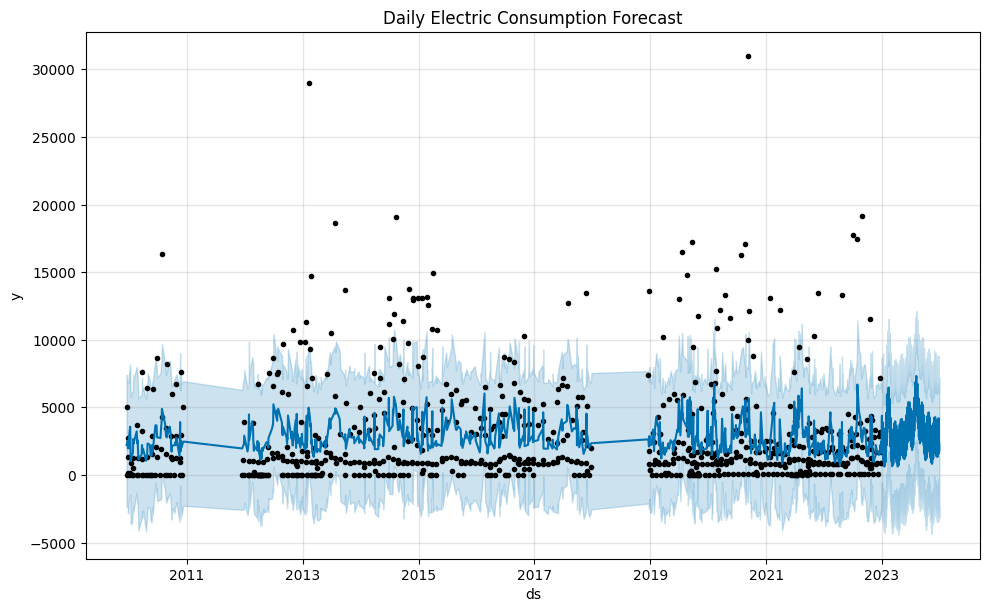

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/rpcct8d3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/t8xdnblm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77814', 'data', 'file=/tmp/tmp_8q49g5y/rpcct8d3.json', 'init=/tmp/tmp_8q49g5y/t8xdnblm.json', 'output', 'file=/tmp/tmp_8q49g5y/prophet_modelzjr_c3_2/prophet_model-20231214023054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:30:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:30:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


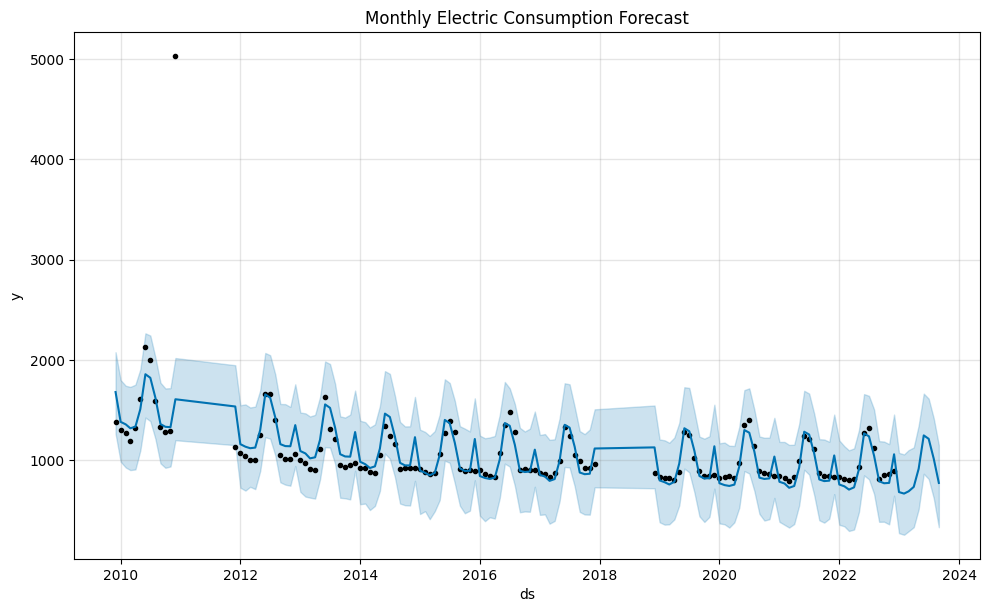

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/nfea29iz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/xqljox4b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27929', 'data', 'file=/tmp/tmp_8q49g5y/nfea29iz.json', 'init=/tmp/tmp_8q49g5y/xqljox4b.json', 'output', 'file=/tmp/tmp_8q49g5y/prophet_model1kzbpvgu/prophet_model-20231214023054.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:30:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:30:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:

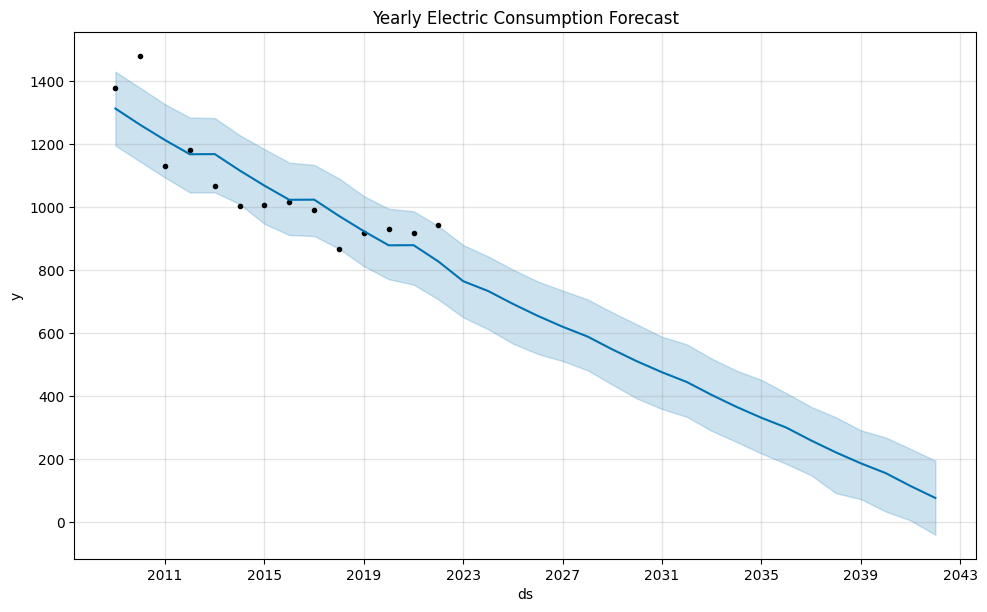

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Function to prepare data for Prophet and make predictions
def prepare_and_forecast(data, periods, frequency):
    model = Prophet(growth='linear')
    model.add_seasonality(name='custom', period=365.25, fourier_order=5)
    model.fit(data)

    future_dates = model.make_future_dataframe(periods=periods, freq=frequency)
    forecast = model.predict(future_dates)
    return model, forecast

# Function to plot the forecast
def plot_forecast(model, forecast, title):
    fig = model.plot(forecast)
    plt.title(title)
    plt.show()

# Daily Forecast for 365 days
model_daily, daily_forecast = prepare_and_forecast(daily_consumption, 365, 'D')
plot_forecast(model_daily, daily_forecast, 'Daily Electric Consumption Forecast')

# Monthly Forecast for 9 months
model_monthly, monthly_forecast = prepare_and_forecast(monthly_consumption, 9, 'M')
plot_forecast(model_monthly, monthly_forecast, 'Monthly Electric Consumption Forecast')

# Yearly Forecast for 20 years
model_yearly, yearly_forecast = prepare_and_forecast(yearly_consumption, 20, 'Y')
plot_forecast(model_yearly, yearly_forecast, 'Yearly Electric Consumption Forecast')


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Function to evaluate a model and return MAE, MAPE, and R^2
def evaluate_model(data, forecast):
    historical_data = data['y'].values
    predicted_data = forecast['yhat'][-len(data):].values  # Use the same length as historical data
    mae = mean_absolute_error(historical_data, predicted_data)
    mape = mean_absolute_percentage_error(historical_data, predicted_data)
    r2 = r2_score(historical_data, predicted_data)
    return mae, mape, r2

# Evaluate Daily Model
mae_daily, mape_daily, r2_daily = evaluate_model(daily_consumption, daily_forecast)

# Evaluate Monthly Model
mae_monthly, mape_monthly, r2_monthly = evaluate_model(monthly_consumption, monthly_forecast)

# Evaluate Yearly Model
mae_yearly, mape_yearly, r2_yearly = evaluate_model(yearly_consumption, yearly_forecast)

# Print evaluation results
print("Daily Model:")
print(f"MAE: {mae_daily}")
print(f"MAPE: {mape_daily}")
print(f"R^2: {r2_daily}")
print()

print("Monthly Model:")
print(f"MAE: {mae_monthly}")
print(f"MAPE: {mape_monthly}")
print(f"R^2: {r2_monthly}")
print()

print("Yearly Model:")
print(f"MAE: {mae_yearly}")
print(f"MAPE: {mape_yearly}")
print(f"R^2: {r2_yearly}")


Daily Model:
MAE: 2850.6274815456272
MAPE: 4.0936305730236006e+17
R^2: -0.10324277175120389

Monthly Model:
MAE: 285.194818145277
MAPE: 0.2417114813386885
R^2: -0.1735995387556719

Yearly Model:
MAE: 746.6150526268667
MAPE: 0.7148794327636121
R^2: -17.865945154473376


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/o1xnz9xu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/0q1jzgms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15839', 'data', 'file=/tmp/tmp_8q49g5y/o1xnz9xu.json', 'init=/tmp/tmp_8q49g5y/0q1jzgms.json', 'output', 'file=/tmp/tmp_8q49g5y/prophet_modely1vx5dld/prophet_model-20231214023134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:31:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:31:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


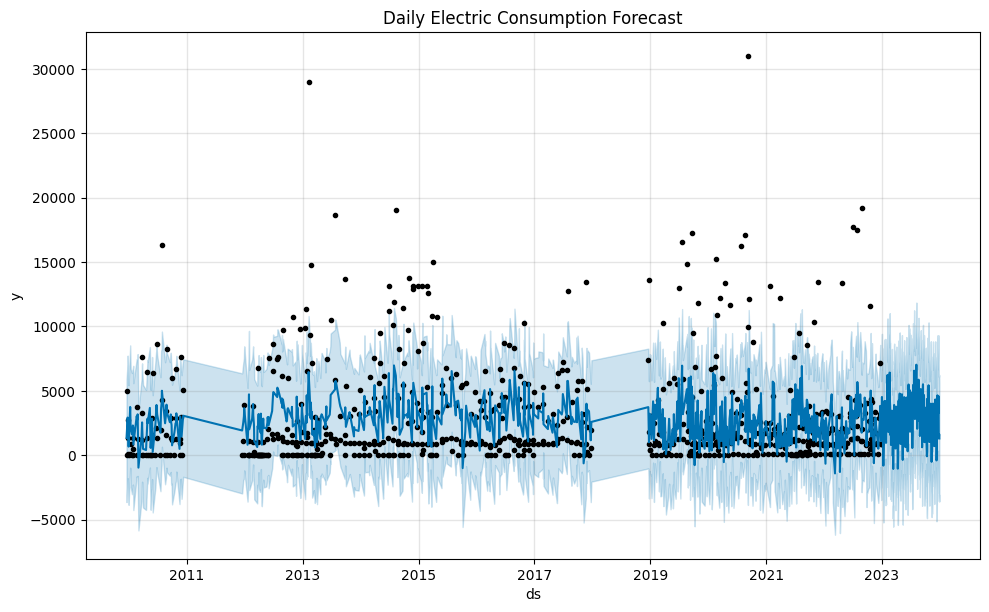

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/lf004_oj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/nwua8ee8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86761', 'data', 'file=/tmp/tmp_8q49g5y/lf004_oj.json', 'init=/tmp/tmp_8q49g5y/nwua8ee8.json', 'output', 'file=/tmp/tmp_8q49g5y/prophet_modelav752qhv/prophet_model-20231214023135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:31:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:31:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


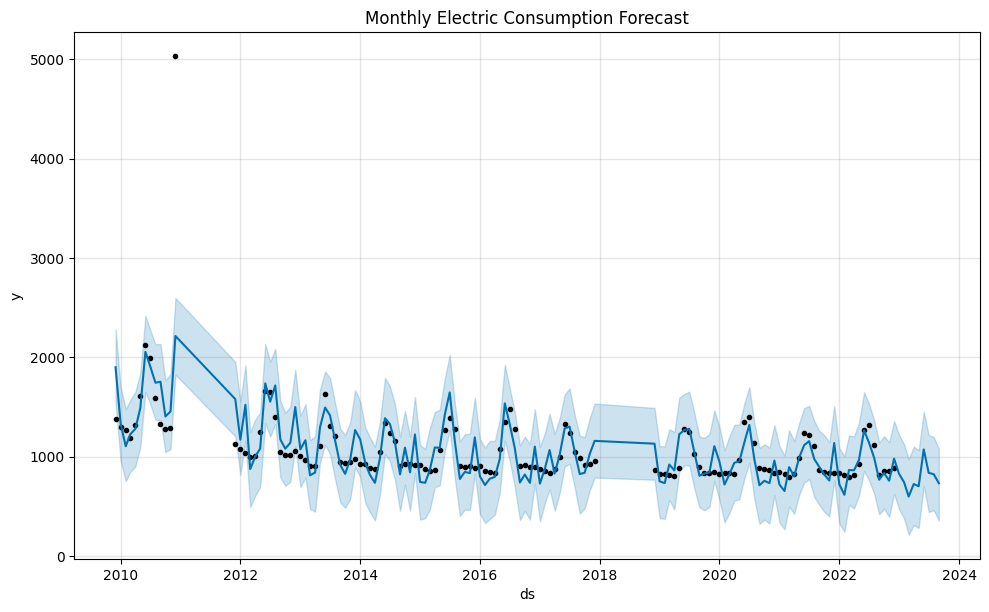

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/ezcioqtm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/9z61nswi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11837', 'data', 'file=/tmp/tmp_8q49g5y/ezcioqtm.json', 'init=/tmp/tmp_8q49g5y/9z61nswi.json', 'output', 'file=/tmp/tmp_8q49g5y/prophet_modeltpbq7_xo/prophet_model-20231214023136.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:31:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:31:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


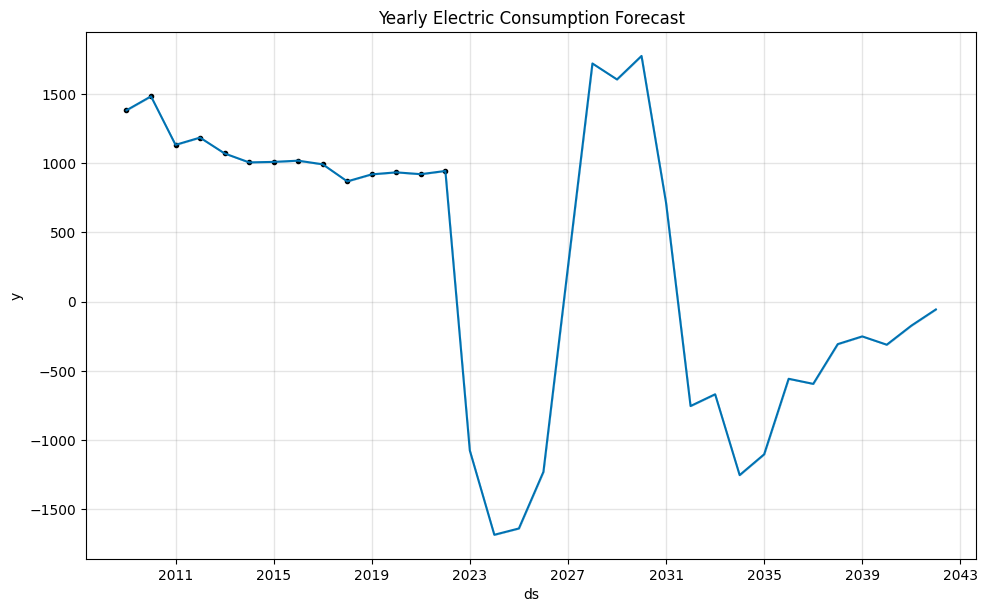

In [ ]:
def prepare_and_forecast(data, periods, frequency):
    model = Prophet(
        growth='linear',
        daily_seasonality=False,
        weekly_seasonality=True,
        yearly_seasonality=True,
        seasonality_mode='multiplicative', # Change to 'multiplicative' if seasonality effects are proportional to the trend
        changepoint_prior_scale=0.05 # Adjust this parameter to control how sensitive the trend is to changes
    )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

    # Add country-specific holidays if you have not done so
    # model.add_country_holidays(country_name='US')

    model.fit(data)
    future_dates = model.make_future_dataframe(periods=periods, freq=frequency)
    forecast = model.predict(future_dates)
    return model, forecast

def plot_forecast(model, forecast, title):
    fig = model.plot(forecast)
    plt.title(title)
    plt.show()

# Daily Forecast for 365 days
model_daily, daily_forecast = prepare_and_forecast(daily_consumption, 365, 'D')
plot_forecast(model_daily, daily_forecast, 'Daily Electric Consumption Forecast')

# Monthly Forecast for 9 months
model_monthly, monthly_forecast = prepare_and_forecast(monthly_consumption, 9, 'M')
plot_forecast(model_monthly, monthly_forecast, 'Monthly Electric Consumption Forecast')

# Yearly Forecast for 20 years
model_yearly, yearly_forecast = prepare_and_forecast(yearly_consumption, 20, 'Y')
plot_forecast(model_yearly, yearly_forecast, 'Yearly Electric Consumption Forecast')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Function to evaluate a model and return MAE, MAPE, and R^2
def evaluate_model(data, forecast):
    historical_data = data['y'].values
    predicted_data = forecast['yhat'][-len(data):].values  # Use the same length as historical data
    mae = mean_absolute_error(historical_data, predicted_data)
    mape = mean_absolute_percentage_error(historical_data, predicted_data)
    r2 = r2_score(historical_data, predicted_data)
    return mae, mape, r2

# Evaluate Daily Model
mae_daily, mape_daily, r2_daily = evaluate_model(daily_consumption, daily_forecast)

# Evaluate Monthly Model
mae_monthly, mape_monthly, r2_monthly = evaluate_model(monthly_consumption, monthly_forecast)

# Evaluate Yearly Model
mae_yearly, mape_yearly, r2_yearly = evaluate_model(yearly_consumption, yearly_forecast)

# Print evaluation results
print("Daily Model:")
print(f"MAE: {mae_daily}")
print(f"MAPE: {mape_daily}")
print(f"R^2: {r2_daily}")
print()

print("Monthly Model:")
print(f"MAE: {mae_monthly}")
print(f"MAPE: {mape_monthly}")
print(f"R^2: {r2_monthly}")
print()

print("Yearly Model:")
print(f"MAE: {mae_yearly}")
print(f"MAPE: {mape_yearly}")
print(f"R^2: {r2_yearly}")


Daily Model:
MAE: 2910.621310993376
MAPE: 4.3692695458675245e+17
R^2: -0.1328187959296505

Monthly Model:
MAE: 295.7598572356069
MAPE: 0.25256229984135686
R^2: -0.13522250381574596

Yearly Model:
MAE: 1272.4156374844595
MAPE: 1.2639811697261545
R^2: -65.92912398216467


In [ ]:

# Function to prepare data for Prophet and make predictions
def prepare_and_forecast(data, periods, frequency):
    model = Prophet(
        growth='linear',
        daily_seasonality=False,
        weekly_seasonality=False,
        yearly_seasonality=True,
        seasonality_mode='additive'
    )
    model.fit(data)

    future_dates = model.make_future_dataframe(periods=periods, freq=frequency)
    forecast = model.predict(future_dates)

    return forecast[['ds', 'yhat']]

# Daily Forecast for 365 days
daily_forecast = prepare_and_forecast(daily_consumption, 365, 'D')

# Monthly Forecast for 12 months (or more if needed)
monthly_forecast = prepare_and_forecast(monthly_consumption, 12, 'M')

# Yearly Forecast for 10 years (or more if needed)
yearly_forecast = prepare_and_forecast(yearly_consumption, 10, 'Y')

# Display the forecasted values
print("Daily Forecast:")
print(daily_forecast.tail())
print("\nMonthly Forecast:")
print(monthly_forecast.tail())
print("\nYearly Forecast:")
print(yearly_forecast.tail())


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/9g5y684g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/d87u83uc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78823', 'data', 'file=/tmp/tmp_8q49g5y/9g5y684g.json', 'init=/tmp/tmp_8q49g5y/d87u83uc.json', 'output', 'file=/tmp/tmp_8q49g5y/prophet_model0z1uhvys/prophet_model-20231214023929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:39:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:39:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/hh0roifl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/jjezsqq4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Daily Forecast:
             ds         yhat
1116 2023-12-25  1956.394944
1117 2023-12-26  2002.403550
1118 2023-12-27  2046.036541
1119 2023-12-28  2085.378952
1120 2023-12-29  2118.618596

Monthly Forecast:
            ds         yhat
142 2023-07-31  1011.751738
143 2023-08-31   769.136317
144 2023-09-30   747.825752
145 2023-10-31   749.900571
146 2023-11-30  1155.153271

Yearly Forecast:
           ds        yhat
19 2027-12-31  577.408155
20 2028-12-31  545.427406
21 2029-12-31  505.083546
22 2030-12-31  467.449513
23 2031-12-31  432.521765



# Borough

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/1nwezj27.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/kywnqg03.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2243', 'data', 'file=/tmp/tmp_8q49g5y/1nwezj27.json', 'init=/tmp/tmp_8q49g5y/kywnqg03.json', 'output', 'file=/tmp/tmp_8q49g5y/prophet_modelvyqcl12p/prophet_model-20231214031544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:15:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:15:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


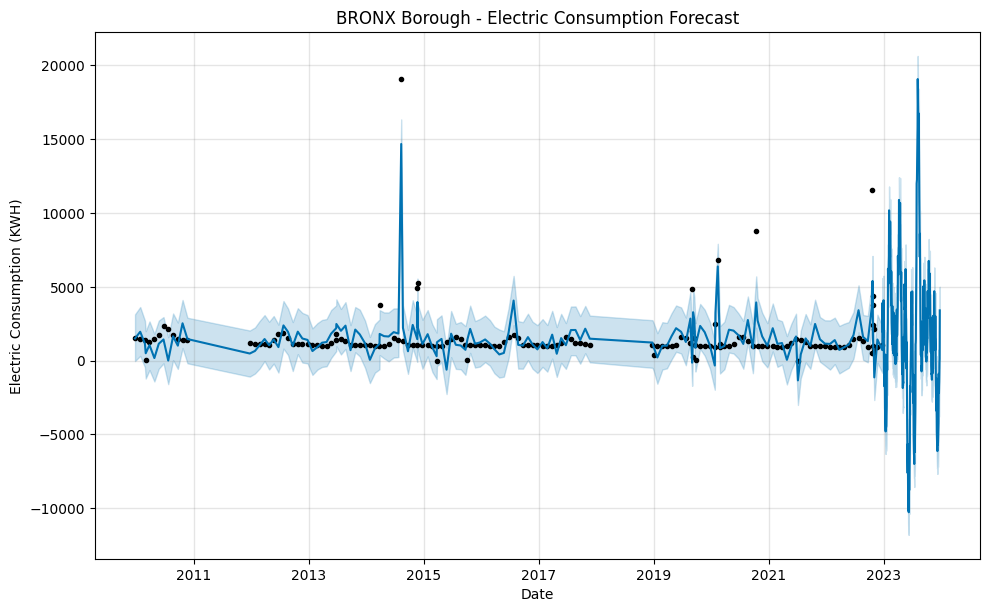

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/cs5qvq19.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/c2swxacz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16016', 'data', 'file=/tmp/tmp_8q49g5y/cs5qvq19.json', 'init=/tmp/tmp_8q49g5y/c2swxacz.json', 'output', 'file=/tmp/tmp_8q49g5y/prophet_modelnwu_px4u/prophet_model-20231214031548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:15:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:15:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


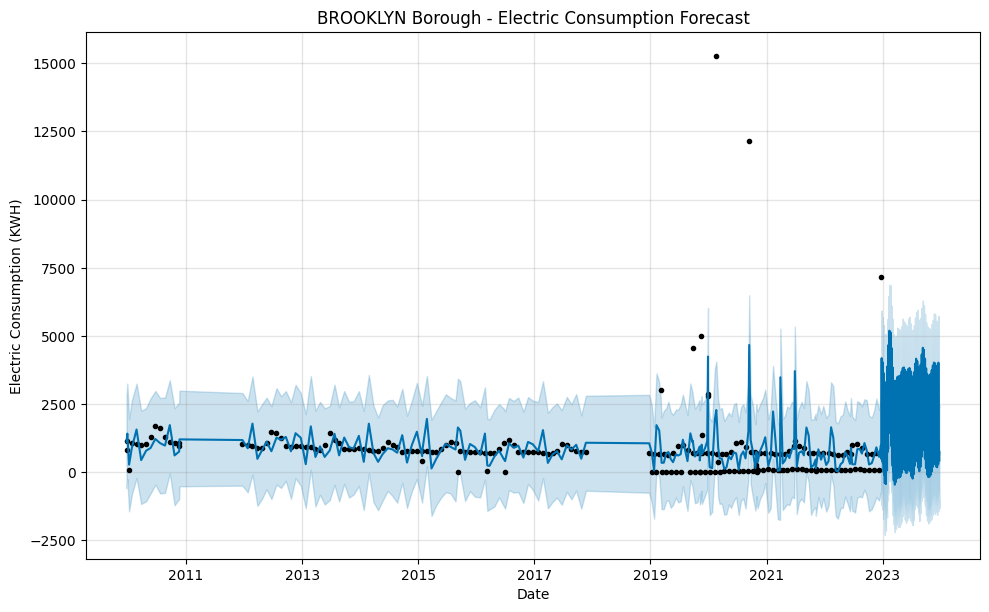

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/3blbkx_p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/etw0qnm0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78349', 'data', 'file=/tmp/tmp_8q49g5y/3blbkx_p.json', 'init=/tmp/tmp_8q49g5y/etw0qnm0.json', 'output', 'file=/tmp/tmp_8q49g5y/prophet_modelbb_4a4t3/prophet_model-20231214031550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:15:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:15:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


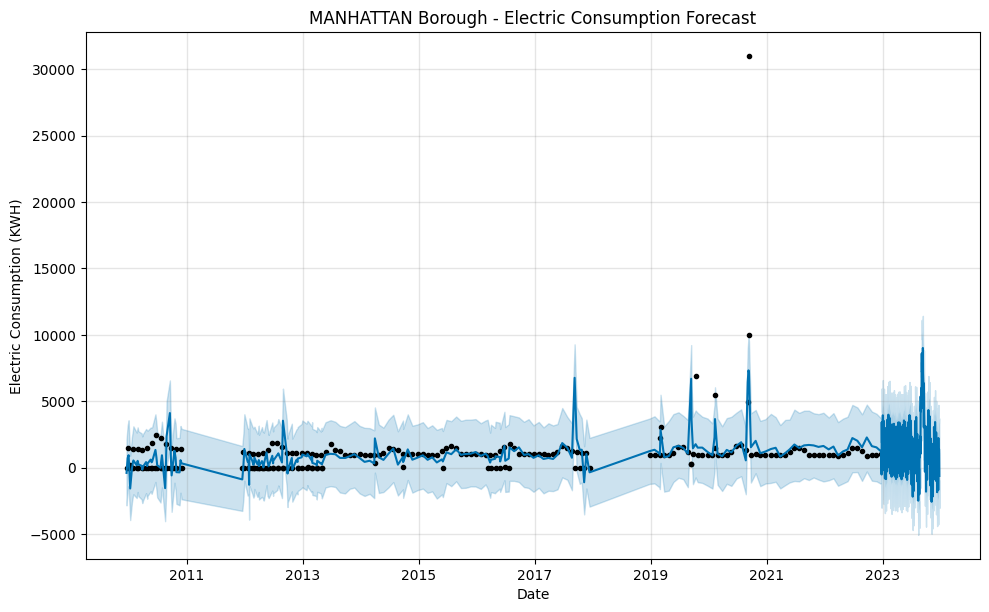

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/6py5g70s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/9usjrdbi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26501', 'data', 'file=/tmp/tmp_8q49g5y/6py5g70s.json', 'init=/tmp/tmp_8q49g5y/9usjrdbi.json', 'output', 'file=/tmp/tmp_8q49g5y/prophet_modelbv_b4qtu/prophet_model-20231214031551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:15:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:15:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


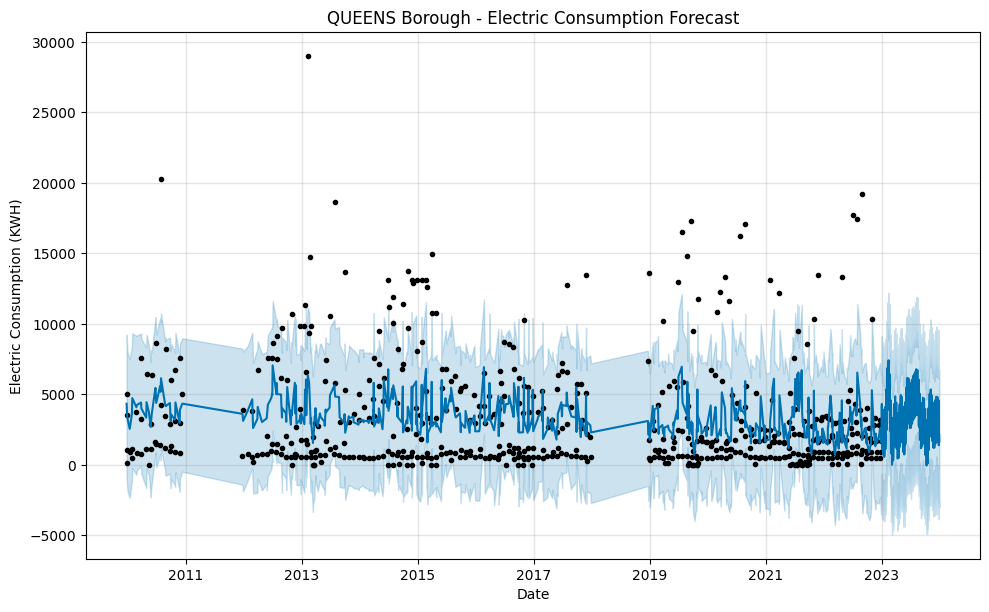

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/5kp8e692.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/glrjw2_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33788', 'data', 'file=/tmp/tmp_8q49g5y/5kp8e692.json', 'init=/tmp/tmp_8q49g5y/glrjw2_5.json', 'output', 'file=/tmp/tmp_8q49g5y/prophet_modeld6bu90oc/prophet_model-20231214031553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:15:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:15:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


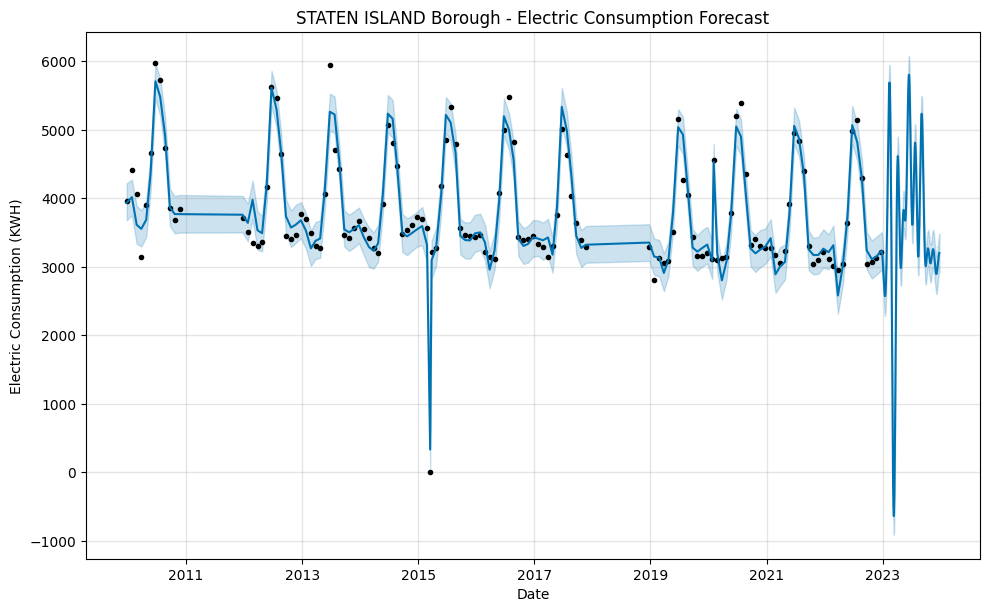

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/pldedgk6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/ay0wi7as.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4186', 'data', 'file=/tmp/tmp_8q49g5y/pldedgk6.json', 'init=/tmp/tmp_8q49g5y/ay0wi7as.json', 'output', 'file=/tmp/tmp_8q49g5y/prophet_modelzvznk8pm/prophet_model-20231214031553.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:15:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:15:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


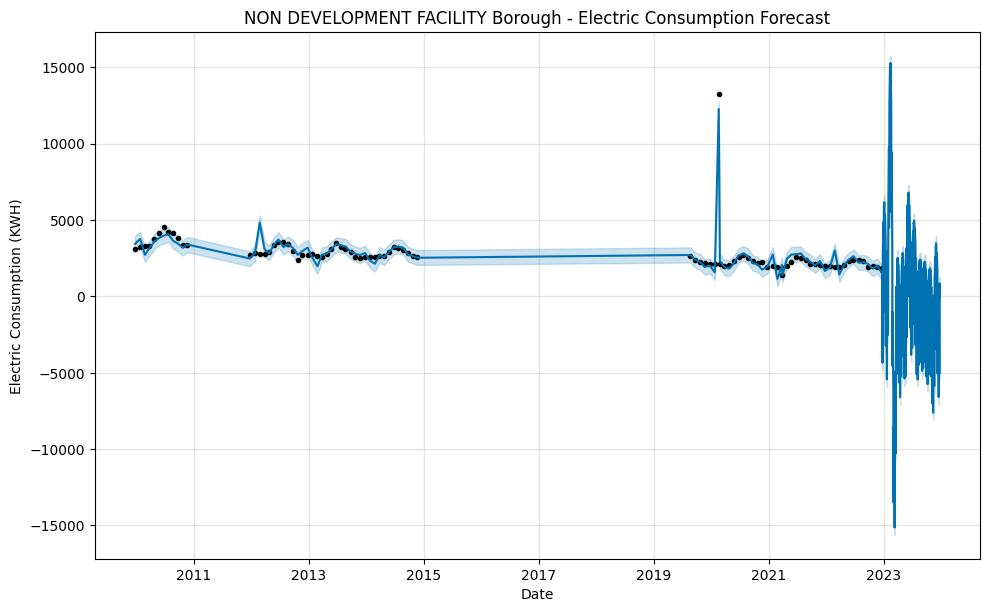

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/249q_rmg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8q49g5y/dghkp0cd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73559', 'data', 'file=/tmp/tmp_8q49g5y/249q_rmg.json', 'init=/tmp/tmp_8q49g5y/dghkp0cd.json', 'output', 'file=/tmp/tmp_8q49g5y/prophet_model_qf5rz6r/prophet_model-20231214031555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:15:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:15:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


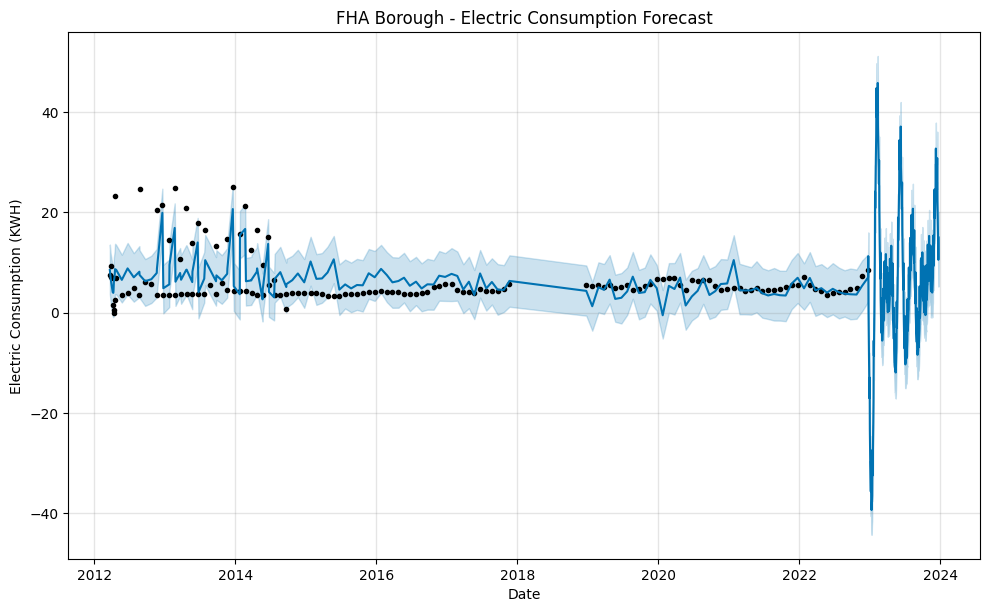

In [ ]:
electric_data_clean = df[['Borough', 'Service Start Date', 'Service End Date', 'Consumption (KWH)']].dropna()
electric_data_clean['Service Start Date'] = pd.to_datetime(electric_data_clean['Service Start Date'], errors='coerce')
electric_data_clean['Service End Date'] = pd.to_datetime(electric_data_clean['Service End Date'], errors='coerce')

# Function to calculate mean consumption
def calculate_mean_consumption(group):
    total_consumption = group['Consumption (KWH)'].sum()
    total_days = (group['Service End Date'] - group['Service Start Date']).dt.days.sum()
    return total_consumption / total_days if total_days > 0 else np.nan

# Creating a dictionary to hold the forecasts
borough_forecasts = {}

# Loop through each borough and perform forecasting
for borough in electric_data_clean['Borough'].unique():
    borough_data = electric_data_clean[electric_data_clean['Borough'] == borough]
    borough_data = borough_data.groupby('Service Start Date').apply(calculate_mean_consumption).reset_index(name='Daily Consumption')
    borough_data = borough_data.rename(columns={'Service Start Date': 'ds', 'Daily Consumption': 'y'})

    # Fit the Prophet model
    model = Prophet()
    model.fit(borough_data)

    # Make future dataframe for 365 days
    future = model.make_future_dataframe(periods=365)

    # Forecast the future
    forecast = model.predict(future)

    # Store the forecast
    borough_forecasts[borough] = forecast

    # Plot the forecast
    fig = model.plot(forecast)
    plt.title(f'{borough} Borough - Electric Consumption Forecast')
    plt.ylabel('Electric Consumption (KWH)')
    plt.xlabel('Date')
    plt.show()


# XGBOOST

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score


In [ ]:
temperature_data = pd.read_csv('Temperature1.csv')

In [ ]:
temperature_data.shape

(5113, 2)

In [ ]:
# Assuming the temperature data has a date column named 'DATE'
temperature_data['DATE'] = pd.to_datetime(temperature_data['DATE'])
temperature_data = temperature_data.rename(columns={'DATE': 'ds', 'AVERAGE TEMPERATURE': 'Temperature'})


In [ ]:
temperature_data.head(5),temperature_data.tail(5)

(          ds Temperature
 0 2009-01-01        17.5
 1 2009-01-02          27
 2 2009-01-03        31.5
 3 2009-01-04          29
 4 2009-01-05        35.5,
              ds Temperature
 5108 2022-12-27          32
 5109 2022-12-28          40
 5110 2022-12-29        45.5
 5111 2022-12-30          54
 5112 2022-12-31        52.5)

In [ ]:

# Merging Temperature Data with Consumption Data
daily_data_merged = pd.merge(daily_consumption.rename(columns={'Service Start Date': 'ds'}), temperature_data, on='ds', how='left')
monthly_data_merged = pd.merge(monthly_consumption.rename(columns={'Month-Year': 'ds'}), temperature_data, on='ds', how='left')
yearly_data_merged = pd.merge(yearly_consumption.rename(columns={'Year': 'ds'}), temperature_data, on='ds', how='left')


In [ ]:
# Prepare feature and target variables for XGBoost
def prepare_data(df):
    df['day_of_week'] = df['ds'].dt.dayofweek
    df['month_of_year'] = df['ds'].dt.month
    df['week_of_year'] = df['ds'].dt.isocalendar().week
    X = df[['day_of_week', 'month_of_year', 'week_of_year', 'Temperature']]
    y = df['y']
    return X, y


In [ ]:
# Split data into training and testing sets
X_train_daily, X_test_daily, y_train_daily, y_test_daily = train_test_split(X_daily, y_daily, test_size=0.2, random_state=42)
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X_monthly, y_monthly, test_size=0.2, random_state=42)
X_train_yearly, X_test_yearly, y_train_yearly, y_test_yearly = train_test_split(X_yearly, y_yearly, test_size=0.2, random_state=42)



In [ ]:
daily_data_merged.head()


,ds,y,Temperature,day_of_week,month_of_year,week_of_year
0,2009-12-17,0.194118,22.0,3,12,51
1,2009-12-23,5017.352941,20.0,2,12,52
2,2009-12-24,1364.361271,31.0,3,12,52
3,2009-12-25,127.058824,31.0,4,12,52
4,2009-12-29,2763.724490,22.5,1,12,53


In [ ]:
# Convert the 'Temperature' column to numeric, and handle NaN values if necessary
daily_data_merged['Temperature'] = pd.to_numeric(daily_data_merged['Temperature'], errors='coerce')
monthly_data_merged['Temperature'] = pd.to_numeric(monthly_data_merged['Temperature'], errors='coerce')
yearly_data_merged['Temperature'] = pd.to_numeric(yearly_data_merged['Temperature'], errors='coerce')

# You may choose to fill NaN values with a specific value, like the mean or median
daily_data_merged['Temperature'].fillna(daily_data_merged['Temperature'].mean(), inplace=True)
monthly_data_merged['Temperature'].fillna(monthly_data_merged['Temperature'].mean(), inplace=True)
yearly_data_merged['Temperature'].fillna(yearly_data_merged['Temperature'].mean(), inplace=True)

# Prepare your feature matrices and target vectors for training
X_train_daily, y_train_daily = prepare_data(daily_data_merged)
X_train_monthly, y_train_monthly = prepare_data(monthly_data_merged)
X_train_yearly, y_train_yearly = prepare_data(yearly_data_merged)

# Train XGBoost models
model_daily = xgb.XGBRegressor(objective ='reg:squarederror')
model_daily.fit(X_train_daily, y_train_daily)

model_monthly = xgb.XGBRegressor(objective ='reg:squarederror')
model_monthly.fit(X_train_monthly, y_train_monthly)

model_yearly = xgb.XGBRegressor(objective ='reg:squarederror')
model_yearly.fit(X_train_yearly, y_train_yearly)

# Continue with the rest of your analysis, predictions, and plotting


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

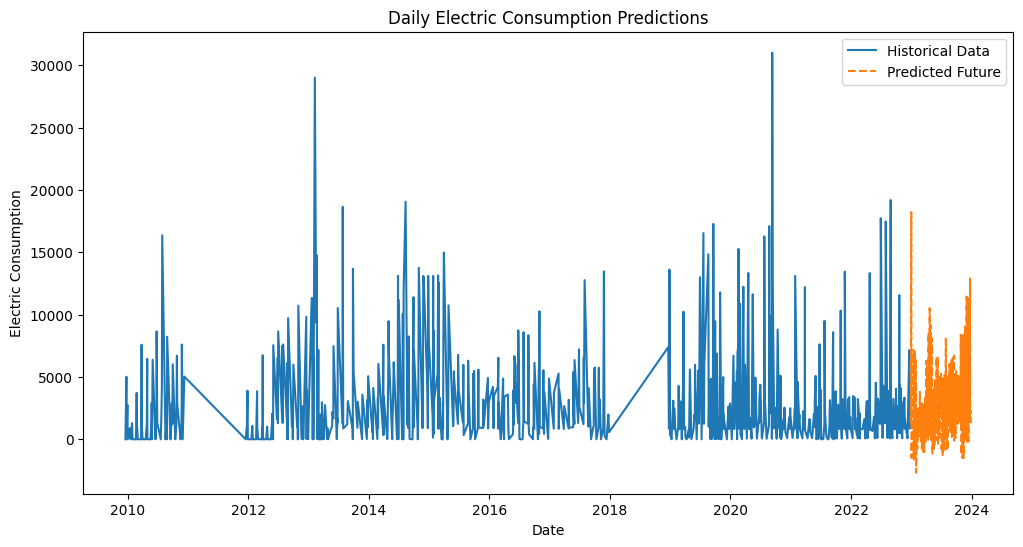

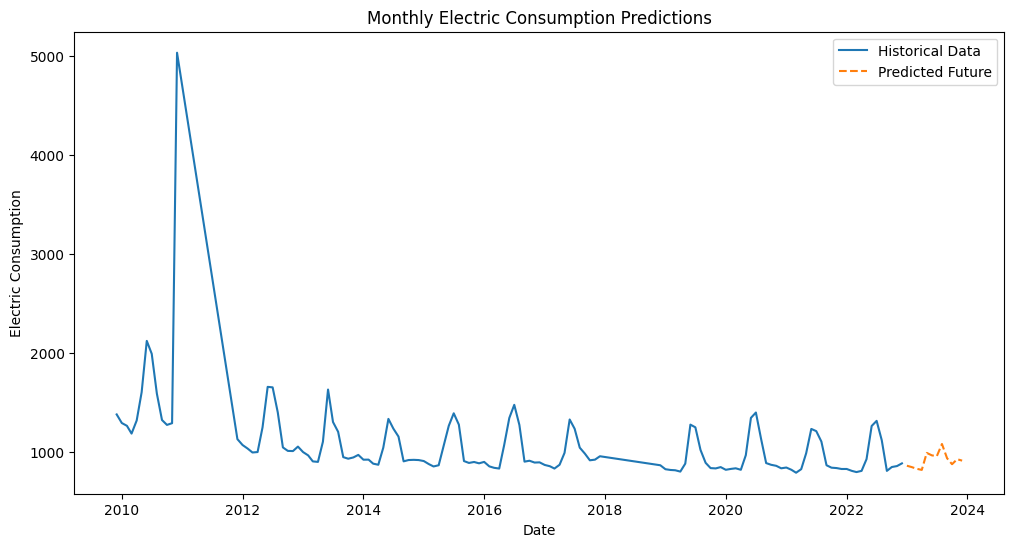

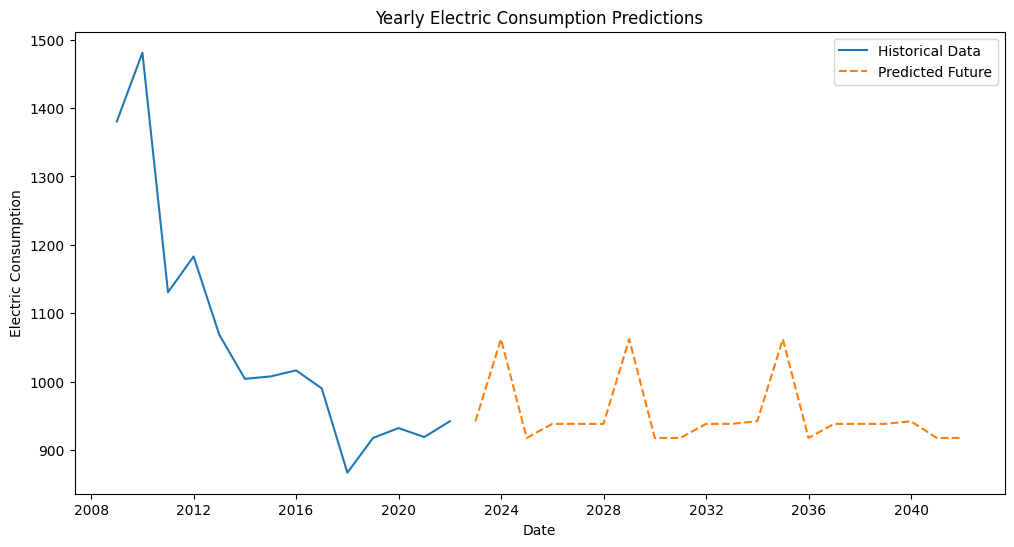

In [ ]:
# Prediction and Visualization
def predict_and_plot(model, data, title, periods, freq):
    future_dates = pd.date_range(start=data['ds'].max(), periods=periods, freq=freq)
    future_df = pd.DataFrame(future_dates, columns=['ds'])
    future_df['day_of_week'] = future_df['ds'].dt.dayofweek
    future_df['month_of_year'] = future_df['ds'].dt.month
    future_df['week_of_year'] = future_df['ds'].dt.isocalendar().week
    future_df['Temperature'] = data['Temperature'].iloc[-1]  # Use last known temperature
    future_df['predicted_ec'] = model.predict(future_df[['day_of_week', 'month_of_year', 'week_of_year', 'Temperature']])

    plt.figure(figsize=(12, 6))
    plt.plot(data['ds'], data['y'], label='Historical Data')
    plt.plot(future_df['ds'], future_df['predicted_ec'], label='Predicted Future', linestyle='--')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Electric Consumption')
    plt.legend()
    plt.show()

# Plot for each time frame
predict_and_plot(model_daily, daily_data_merged, 'Daily Electric Consumption Predictions', 365, 'D')
predict_and_plot(model_monthly, monthly_data_merged, 'Monthly Electric Consumption Predictions', 12, 'M')
predict_and_plot(model_yearly, yearly_data_merged, 'Yearly Electric Consumption Predictions', 20, 'A')



In [ ]:
# Evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mape, r2

mae_daily, mape_daily, r2_daily = evaluate_model(model_daily, X_test_daily, y_test_daily)
mae_monthly, mape_monthly, r2_monthly = evaluate_model(model_monthly, X_test_monthly, y_test_monthly)
mae_yearly, mape_yearly, r2_yearly = evaluate_model(model_yearly, X_test_yearly, y_test_yearly)

# Print evaluation metrics
print(f"Daily Model - MAE: {mae_daily}, MAPE: {mape_daily}, R2: {r2_daily}")
print(f"Monthly Model - MAE: {mae_monthly}, MAPE: {mape_monthly}, R2: {r2_monthly}")
print(f"Yearly Model - MAE: {mae_yearly}, MAPE: {mape_yearly}, R2: {r2_yearly}")


Daily Model - MAE: 3500.6700192802105, MAPE: 6.121512939738205e+17, R2: -0.6403194471955562
Monthly Model - MAE: 293.9914530192255, MAPE: 0.16358693931358392, R2: -0.10824257014823457
Yearly Model - MAE: 195.79627115477115, MAPE: 0.1722011247779545, R2: -0.15052673573532527


# Borough with xgboost

In [ ]:
# Prepare the electric consumption data
electric_data_clean = df[['Borough', 'Service Start Date', 'Service End Date', 'Consumption (KWH)']].dropna()
electric_data_clean['Service Start Date'] = pd.to_datetime(electric_data_clean['Service Start Date'], errors='coerce')
electric_data_clean['Service End Date'] = pd.to_datetime(electric_data_clean['Service End Date'], errors='coerce')

# Function to calculate mean consumption
def calculate_mean_consumption(group):
    total_consumption = group['Consumption (KWH)'].sum()
    total_days = (group['Service End Date'] - group['Service Start Date']).dt.days.sum()
    return total_consumption / total_days if total_days > 0 else np.nan

borough_forecasts = {}
def create_future_dates(start_date, periods, freq='D'):
    return pd.date_range(start=start_date, periods=periods, freq=freq)




In [ ]:
# Loop through each borough and perform forecasting
for borough in electric_data_clean['Borough'].unique():
    # Preparing borough-specific data
    borough_data = electric_data_clean[electric_data_clean['Borough'] == borough]
    borough_data = borough_data.groupby('Service Start Date').apply(calculate_mean_consumption).reset_index(name='y')
    borough_data = borough_data.rename(columns={'Service Start Date': 'ds'})
    borough_data['ds'] = pd.to_datetime(borough_data['ds'])

    # Merging with temperature data
    borough_data_merged = pd.merge(borough_data, temperature_data, on='ds', how='left')

    # Feature Engineering
    borough_data_merged['day_of_week'] = borough_data_merged['ds'].dt.dayofweek
    borough_data_merged['month_of_year'] = borough_data_merged['ds'].dt.month
    borough_data_merged['week_of_year'] = borough_data_merged['ds'].dt.isocalendar().week
    borough_data_merged['Temperature'] = pd.to_numeric(borough_data_merged['Temperature'], errors='coerce')
    borough_data_merged.dropna(inplace=True)

    X = borough_data_merged[['day_of_week', 'month_of_year', 'week_of_year', 'Temperature']]
    y = borough_data_merged['y']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the XGBoost model for each borough
    model = xgb.XGBRegressor(objective='reg:squarederror')
    model.fit(X_train, y_train)

    # Storing the model and evaluation metrics
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    borough_forecasts[borough] = {
        'model': model,
        'mae': mae,
        'mape': mape,
        'r2': r2
    }



In [ ]:
# Output the evaluation metrics for each borough
for borough, forecast in borough_forecasts.items():
    print(f"Borough: {borough}")
    print(f"MAE: {forecast['mae']}, MAPE: {forecast['mape']}, R^2: {forecast['r2']}\n")

Borough: BRONX
MAE: 492.5616544170142, MAPE: 0.43186262607438763, R^2: -1.3259619286010076

Borough: BROOKLYN
MAE: 850.3416458703118, MAPE: 36.6539443807674, R^2: -20.363421799814166

Borough: MANHATTAN
MAE: 1214.788376256679, MAPE: 1.1093408868948101e+17, R^2: 0.11757007148331011

Borough: QUEENS
MAE: 3595.430938984475, MAPE: 2.217695544742173, R^2: -0.4886930377259724

Borough: STATEN ISLAND
MAE: 432.09553788206136, MAPE: 5.2968728332191514e+17, R^2: 0.5670508488838402

Borough: NON DEVELOPMENT FACILITY
MAE: 593.23187566362, MAPE: 0.2243739682618415, R^2: -0.8733066353472938

Borough: FHA
MAE: 3.6407847259441835, MAPE: 0.5808545320034088, R^2: -0.3159501441023844

